In this project, you will learn the basics of using Keras with TensorFlow as its backend and use it to solve an image classification problem. The data consists of 2D spectrograms of deep space radio signals collected by the Allen Telescope Array at the SETI Institute. The spectrograms will be treated as images to train an image classification model to classify the signals into one of four classes. By the end of the project, you will have built and trained a convolutional neural network from scratch using Keras to classify signals from space.

The model could be optimized using hyperparameter tuning. However, the goal of this notebook is not to build a high performing classifier, rather to show the basic steps to build an image classifier using convolutional neural network. The readers can also get the idea of

* data augmentation using ImageDataGenerator, and 
* Way of saving the weights of a model at some interval which can later be used for transfer learning through 'callbacks' during fitting the model

**Task1: Import Libraries**

In [1]:
!pip install livelossplot
# !pip uninstall 'tensorflow==2.3.1'
!pip install livelossplot
!pip install 'tensorflow==2.1'
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

     |████████████████████████████████| 428 kB 1.0 MB/s eta 0:00:01
  Attempting uninstall: tornado
    Found existing installation: tornado 5.0.2
    Uninstalling tornado-5.0.2:
      Successfully uninstalled tornado-5.0.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

jupyterlab-git 0.10.0 requires nbdime<2.0.0,>=1.1.0, but you'll have nbdime 2.0.0 which is incompatible.
dask-xgboost 0.1.11 requires xgboost<=0.90, but you'll have xgboost 1.2.1 which is incompatible.


     |████████████████████████████████| 421.8 MB 18 kB/s s eta 0:00:01█████████████████████▏        | 304.8 MB 50.8 MB/s eta 0:00:03
     |████████████████████████████████| 50 kB 177 kB/s  eta 0:00:01
     |████████████████████████████████| 448 kB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 39.6 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=76c925502da8f2b6ca21fc358359f6a05c2af91a284293df0ce6921141840715
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboa

# 1. **Task2: Load And Preprocess SETI Data**

In [2]:
train_images=pd.read_csv('../input/mydataset/train/images.csv',header=None)
train_labels=pd.read_csv('../input/mydataset/train/labels.csv',header=None)

val_images=pd.read_csv('../input/mydataset/validation/images.csv',header=None)
val_labels=pd.read_csv('../input/mydataset/validation/labels.csv',header=None)

In [3]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [4]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [5]:
val_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,...,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,...,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,...,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,...,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,...,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824


In [6]:
val_labels.shape

(800, 4)

In [7]:
print("Training Shape: ",train_images.shape,train_labels.shape)
print("Validation Shape: ",val_images.shape,val_labels.shape)

Training Shape:  (3200, 8192) (3200, 4)
Validation Shape:  (800, 8192) (800, 4)


In [8]:
# Data Reshape That suitable for Convolutional Neural Networks
x_train = train_images.values.reshape(3200,64,128,1)
x_val = val_images.values.reshape(800,64,128,1)

y_train=train_labels.values
y_val=val_labels.values

In [9]:
y_val.shape

(800, 4)

**Buils 2D Spectogram**

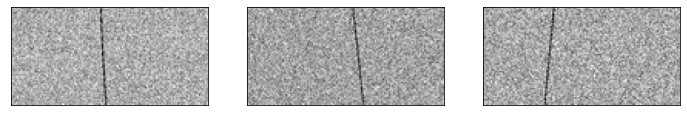

In [10]:
# Task:3 Training images randomely and draw them
plt.figure(0,figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
# np.squeeze is used to delete non  useful dimension in (64,128,1) and transform the shape into (64,128) in order to fit into plt.imshow    
    img=np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap='gray')

# **Task:4 Now Create Data Generator For Training And Validation Data**

In [11]:
# Data augmentation using ImageDataGenerator
# An input batch of images is presented to the ImageDataGenerator.
# The ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.
# The randomly transformed batch is then returned to the calling function.
#The ImageDataGenerator is not returning both the original data and the transformed data — the class only returns the randomly transformed data.
# Ref:https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train=ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val=ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

# All Done For Preprocessing Lets Make CNN Model

In [12]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
# Initialising the CNN
model = Sequential()
# 1st Convolution
model.add(Conv2D(32 , (5 , 5) , padding = "same" , input_shape = (64 , 128 , 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64 , (5 , 5) , padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(4, activation="softmax"))

# Shedule Learning Rate and Compile the Model

In [15]:
# Here, we have a initial learning rate that is fixed during first 5 steps and decreases exponentially afterwards
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate = initial_learning_rate,
                decay_steps = 5,
                decay_rate = 0.96,
                staircase = True
)
optimizers = Adam(learning_rate = lr_schedule)

In [16]:

model.compile(optimizer = optimizers , loss = "categorical_crossentropy" , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 128, 32)       128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 64, 64)       

# Training A Model

In [18]:
checkpoint = ModelCheckpoint("model_weight.h5" , monitor = "val_loss" , save_weights_only = True,
                            mode = "min" , verbose = 0)
callbacks = [PlotLossesCallback() , checkpoint]

batch_size = 32

history = model.fit(
        datagen_train.flow(x_train , y_train , batch_size = batch_size , shuffle = True),
        steps_per_epoch = len(x_train) // batch_size,
        validation_data = datagen_val.flow(x_val , y_val , batch_size = batch_size , shuffle = True),
        validation_steps = len(x_val) // batch_size,
        epochs = 15,
        callbacks = [checkpoint]
)

Train for 100 steps, validate for 25 steps
Epoch 1/15
100/100 [==============================] - 70s 705ms/step - loss: 0.3905 - accuracy: 0.7409 - val_loss: 5.6271 - val_accuracy: 0.2500
Epoch 2/15
100/100 [==============================] - 71s 711ms/step - loss: 0.3741 - accuracy: 0.7522 - val_loss: 4.6406 - val_accuracy: 0.2500
Epoch 3/15
100/100 [==============================] - 71s 713ms/step - loss: 0.3674 - accuracy: 0.7609 - val_loss: 2.9376 - val_accuracy: 0.4250
Epoch 4/15
100/100 [==============================] - 70s 701ms/step - loss: 0.3693 - accuracy: 0.7491 - val_loss: 2.3353 - val_accuracy: 0.4925
Epoch 5/15
100/100 [==============================] - 70s 703ms/step - loss: 0.3672 - accuracy: 0.7522 - val_loss: 0.9253 - val_accuracy: 0.5850
Epoch 6/15
100/100 [==============================] - 78s 784ms/step - loss: 0.3674 - accuracy: 0.7544 - val_loss: 0.4037 - val_accuracy: 0.7425
Epoch 7/15
100/100 [==============================] - 71s 710ms/step - loss: 0.3634 - a

In [19]:
model.evaluate(x_val, y_val)

800/800 [==============================] - 4s 5ms/sample - loss: 0.3572 - accuracy: 0.7563


[0.3572281364889932, 0.75625]

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.52      0.50      0.51       200
           2       0.51      0.53      0.52       200
           3       1.00      1.00      1.00       200

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

Classification accuracy: 0.756250


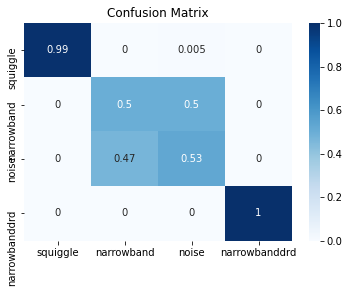

In [21]:
# Values of Recall from above confusion table can be seen on the diagonal below
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax = ax, cmap=plt.cm.Blues); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Thanks For Viewing Happy Coding....